In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import roc_auc_score,roc_curve,scorer

In [2]:
df=pd.read_csv("weatherAUS.csv")

In [3]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [5]:
new_df=df.dropna()

In [6]:
new_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No
142299,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No
142300,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No
142301,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No


In [7]:
dff=new_df[['MinTemp','MaxTemp','Rainfall','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday','RainTomorrow']]


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
Date             145460 non-null object
Location         145460 non-null object
MinTemp          143975 non-null float64
MaxTemp          144199 non-null float64
Rainfall         142199 non-null float64
Evaporation      82670 non-null float64
Sunshine         75625 non-null float64
WindGustDir      135134 non-null object
WindGustSpeed    135197 non-null float64
WindDir9am       134894 non-null object
WindDir3pm       141232 non-null object
WindSpeed9am     143693 non-null float64
WindSpeed3pm     142398 non-null float64
Humidity9am      142806 non-null float64
Humidity3pm      140953 non-null float64
Pressure9am      130395 non-null float64
Pressure3pm      130432 non-null float64
Cloud9am         89572 non-null float64
Cloud3pm         86102 non-null float64
Temp9am          143693 non-null float64
Temp3pm          141851 non-null float64
RainToday        142199 non-null obje

In [9]:
dff['RainToday'].unique()

array(['No', 'Yes'], dtype=object)

In [10]:
from sklearn import preprocessing

In [11]:
le=preprocessing.LabelEncoder()
dff['WindGustDir']=le.fit_transform(dff['WindGustDir'])
dff['WindDir9am']=le.fit_transform(dff['WindDir9am'])
dff['WindDir3pm']=le.fit_transform(dff['WindDir3pm'])

<ipython-input-11-f0ce00f173e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['WindGustDir']=le.fit_transform(dff['WindGustDir'])
<ipython-input-11-f0ce00f173e9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['WindDir9am']=le.fit_transform(dff['WindDir9am'])
<ipython-input-11-f0ce00f173e9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata

In [12]:
from sklearn.tree import DecisionTreeClassifier

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pickle
from sklearn.preprocessing import LabelEncoder

In [13]:
x=dff.drop(['Rainfall','RainToday','RainTomorrow'],axis=1)
y=dff['Rainfall']

In [37]:
x_train,x_test , y_train, y_test = train_test_split(x, y,test_size=0.2)

# Polynomial Regression

In [43]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(2) #theta0, x0,x1,x2
x_poly =pf.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.3)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_hat=lr.predict(x_test)
print("MSE ={}\nR2={}".format(mean_squared_error(y_test,y_hat),r2_score(y_test,y_hat)))

MSE =34.474850528909265
R2=0.2523780462198769


C:\Users\Prathamesh\.conda\envs\Project\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


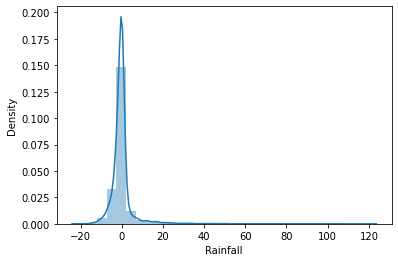

In [44]:
residuals=y_test-y_hat
sns.distplot(residuals,bins=30)
plt.show()

In [45]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(3) #theta0, x0,x1,x2
x_poly =pf.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.3)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_hat=lr.predict(x_test)
print("MSE ={}\nR2={}".format(mean_squared_error(y_test,y_hat),r2_score(y_test,y_hat)))

MSE =33.46308161540712
R2=0.2898174363875814


In [38]:
len(x_train)

45136

In [39]:
len(y_train)

45136

C:\Users\Prathamesh\.conda\envs\Project\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


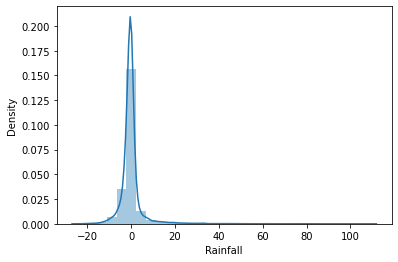

In [46]:
residuals=y_test-y_hat
sns.distplot(residuals,bins=30)
plt.show()

In [46]:
import pickle
with open('Rainfall_Poly3_28.sav','wb') as f:
    pickle.dump(lr,f)

In [48]:
# LR,SVM,DT,RF,ANN

In [47]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
dff['RainToday']=le.fit_transform(dff['RainToday'])
dff['RainTomorrow']=le.fit_transform(dff['RainTomorrow'])
dff['WindGustDir']=le.fit_transform(dff['WindGustDir'])
dff['WindDir9am']=le.fit_transform(dff['WindDir9am'])
dff['WindDir3pm']=le.fit_transform(dff['WindDir3pm'])

<ipython-input-47-32f26ed7a6db>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['RainToday']=le.fit_transform(dff['RainToday'])
<ipython-input-47-32f26ed7a6db>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['RainTomorrow']=le.fit_transform(dff['RainTomorrow'])
<ipython-input-47-32f26ed7a6db>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata

In [48]:
dff

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,17.9,35.2,0.0,11,48.0,1,12,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
6050,18.4,28.9,0.0,8,37.0,10,10,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
6052,19.4,37.6,0.0,5,46.0,5,6,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
6053,21.9,38.4,0.0,14,31.0,14,15,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
6054,24.2,41.0,0.0,14,35.0,7,14,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,19.3,33.4,0.0,1,35.0,9,4,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0,0
142299,21.2,32.6,0.0,0,37.0,9,9,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0,0
142300,20.7,32.8,0.0,0,33.0,0,13,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0,0
142301,19.5,31.8,0.0,2,26.0,9,6,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0,0


In [49]:
x=dff.drop(['RainToday','RainTomorrow','Rainfall'],axis=1)
y=dff['RainToday']

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test , y_train, y_test = train_test_split(x, y,test_size=0.2)

# Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train,y_train)#train model

Y_pred_lr = lr.predict(x_test)


C:\Users\Prathamesh\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\logistic.py:430: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  warnings.warn("Default solver will be changed to 'lbfgs' in 0.22. "


In [52]:
score_lr = round(accuracy_score(Y_pred_lr,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 83.07 %


<AxesSubplot:title={'center':'Logistic_Regression'}>

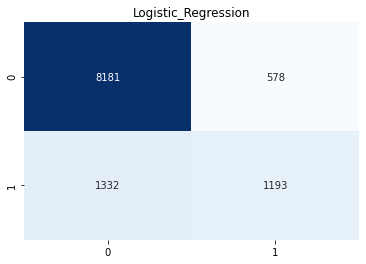

In [53]:
lr_cm=confusion_matrix(y_test,Y_pred_lr)
plt.title("Logistic_Regression")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [54]:
from sklearn import metrics
score_lr=round(metrics.accuracy_score(y_test,Y_pred_lr)*100,2)
score_lr_precision=metrics.precision_score(Y_pred_lr,y_test)
score_lr_recall=round(metrics.recall_score(y_test,Y_pred_lr)*100,2)
score_lr_f1_score=round(metrics.f1_score(y_test, Y_pred_lr)*100,2)

In [29]:
import pickle
with open('raintoday_lr_new.sav','wb') as f:
    pickle.dump(lr,f)

# SVM

In [55]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(x_train, y_train)

Y_pred_svm = sv.predict(x_test)
score_svm = round(accuracy_score(Y_pred_svm,y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 83.14 %


<AxesSubplot:title={'center':'SVM'}>

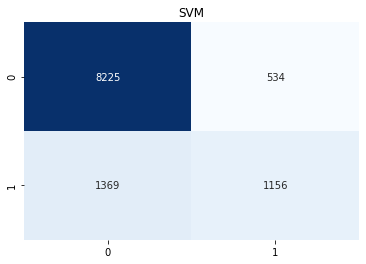

In [56]:
lr_cm=confusion_matrix(y_test,Y_pred_svm)
plt.title("SVM")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [57]:
from sklearn import metrics
score_svm=round(metrics.accuracy_score(y_test,Y_pred_svm)*100,2)
score_svm_precision=metrics.precision_score(Y_pred_svm,y_test)
score_svm_recall=round(metrics.recall_score(y_test,Y_pred_svm)*100,2)
score_svm_f1_score=round(metrics.f1_score(y_test,Y_pred_svm)*100,2)

In [32]:
import pickle
with open('raintoday_svm_new.sav','wb') as f:
    pickle.dump(sv,f)

# DT

In [58]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
Y_pred_dt = dt.predict(x_test)
score_dt = round(accuracy_score(Y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 77.77 %


<AxesSubplot:title={'center':'Decision Tree'}>

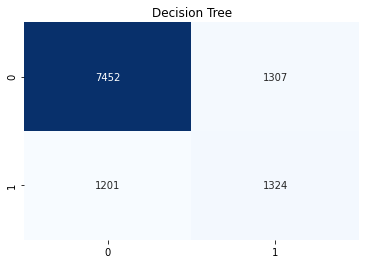

In [59]:
lr_cm=confusion_matrix(y_test,Y_pred_dt)
plt.title("Decision Tree")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [60]:
from sklearn import metrics
score_dt=round(metrics.accuracy_score(y_test,Y_pred_dt)*100,2)
score_dt_precision=metrics.precision_score(Y_pred_dt,y_test)
score_dt_recall=round(metrics.recall_score(y_test,Y_pred_dt)*100,2)
score_dt_f1_score=round(metrics.f1_score(y_test,Y_pred_dt)*100,2)

In [36]:
import pickle
with open('raintoday_dt_new.sav','wb') as f:
    pickle.dump(dt,f)

# Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,n_jobs=2,verbose=2)
rfc.fit(x_train,y_train)
score_rf=rfc.score(x_test,y_test)
Y_pred_rf = rfc.predict(x_test)
score_rf=round(accuracy_score(Y_pred_rf,y_test)*100,2)
print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    1.8s


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    4.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s


The accuracy score achieved using Random Forest is: 85.09 %


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


<AxesSubplot:title={'center':'Random Forest'}>

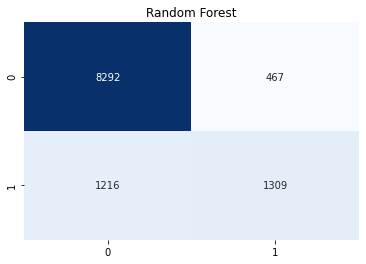

In [62]:
lr_cm=confusion_matrix(y_test,Y_pred_rf)
plt.title("Random Forest")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [63]:
from sklearn import metrics
score_rf=round(metrics.accuracy_score(y_test,Y_pred_rf)*100,2)
score_rf_precision=metrics.precision_score(Y_pred_rf,y_test)
score_rf_recall=round(metrics.recall_score(y_test,Y_pred_rf)*100,2)
score_rf_f1_score=round(metrics.f1_score(y_test,Y_pred_rf)*100,2)

In [41]:
import pickle
with open('raintoday_rf_new.sav','wb') as f:
    pickle.dump(rfc,f)

In [42]:
x_train.shape

(45136, 16)

In [65]:
import tensorflow as tf

# Neural Network

In [66]:
from tensorflow import keras
model=tf.keras.Sequential([
    keras.layers.Dense(20,input_shape=(16,),activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])

In [67]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [68]:
model.fit(x_train,y_train,epochs=30)

Epoch 1/30
1411/1411 [==============================] - 2s 1ms/step - loss: 0.7656 - accuracy: 0.7835
Epoch 2/30
1411/1411 [==============================] - 1s 840us/step - loss: 0.4843 - accuracy: 0.7991
Epoch 3/30
1411/1411 [==============================] - 1s 764us/step - loss: 0.4938 - accuracy: 0.7944
Epoch 4/30
1411/1411 [==============================] - 1s 877us/step - loss: 0.4585 - accuracy: 0.8026
Epoch 5/30
1411/1411 [==============================] - 1s 859us/step - loss: 0.4585 - accuracy: 0.8002
Epoch 6/30
1411/1411 [==============================] - 1s 748us/step - loss: 0.4481 - accuracy: 0.8061
Epoch 7/30
1411/1411 [==============================] - 1s 751us/step - loss: 0.4392 - accuracy: 0.8065
Epoch 8/30
1411/1411 [==============================] - 1s 706us/step - loss: 0.4323 - accuracy: 0.8088
Epoch 9/30
1411/1411 [==============================] - 1s 752us/step - loss: 0.4385 - accuracy: 0.8075
Epoch 10/30
1411/1411 [==============================] - 1s 926us/

In [88]:
a=model.evaluate(x_test,y_test)

353/353 [==============================] - 0s 636us/step - loss: 0.3737 - accuracy: 0.8318


In [77]:
pred=model.predict(x_test)

In [78]:
pred=np.argmax(pred, axis=1)
score_nn_precision=metrics.precision_score(pred,y_test)
score_nn_recall=round(metrics.recall_score(y_test,pred)*100,2)
score_nn_f1_score=round(metrics.f1_score(y_test,pred)*100,2)

In [ ]:
pred

In [53]:
pred_new=[]
for m in pred:
    if m>0.4:
        pred_new.append(1)
    else:
        pred_new.append(0)

In [55]:
model.save("ann.hp5")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ann.hp5\assets


<AxesSubplot:title={'center':'ANN'}>

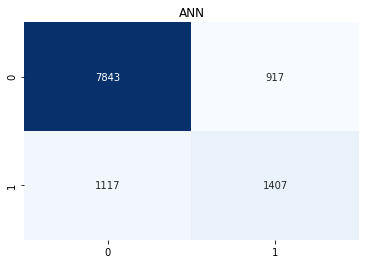

In [56]:
lr_cm=confusion_matrix(y_test,pred_new)
plt.title("ANN")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [81]:
scores = [score_lr_precision,score_svm_precision,score_dt_precision,score_rf_precision]
algorithms = ["Logistic Regression","Support Vector Machine","Decision Tree","Random Forest"]    


for i in range(len(algorithms)):
    print("The Precision achieved using "+algorithms[i]+" is: "+str(scores[i]))

The Precision achieved using Logistic Regression is: 0.47247524752475245
The Precision achieved using Support Vector Machine is: 0.45782178217821784
The Precision achieved using Decision Tree is: 0.5243564356435644
The Precision achieved using Random Forest is: 0.5184158415841584


C:\Users\Prathamesh\.conda\envs\Project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


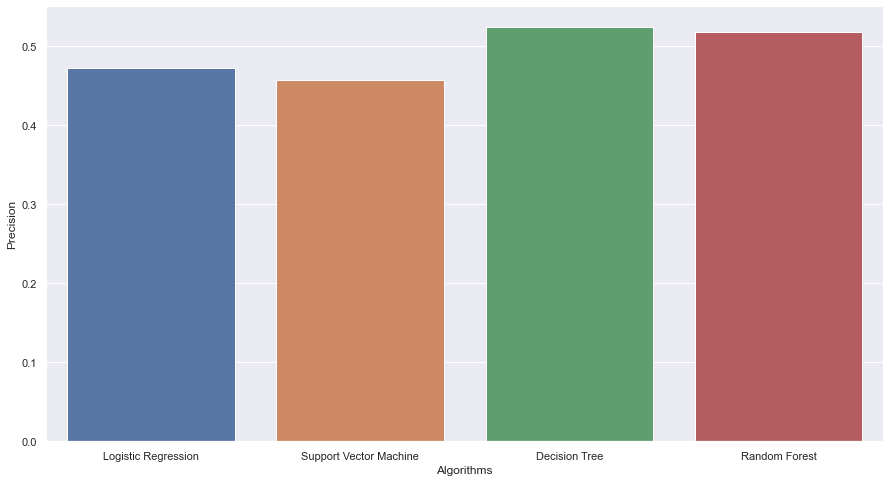

In [82]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Precision")

sns.barplot(algorithms,scores)
plt.show()

In [83]:
scores = [score_lr_recall,score_svm_recall,score_dt_recall,score_rf_recall]
algorithms = ["Logistic Regression","Support Vector Machine","Decision Tree","Random Forest"]    


for i in range(len(algorithms)):
    print("The Recall achieved using "+algorithms[i]+" is: "+str(scores[i]))

The Recall achieved using Logistic Regression is: 47.25
The Recall achieved using Support Vector Machine is: 45.78
The Recall achieved using Decision Tree is: 52.44
The Recall achieved using Random Forest is: 51.84


C:\Users\Prathamesh\.conda\envs\Project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


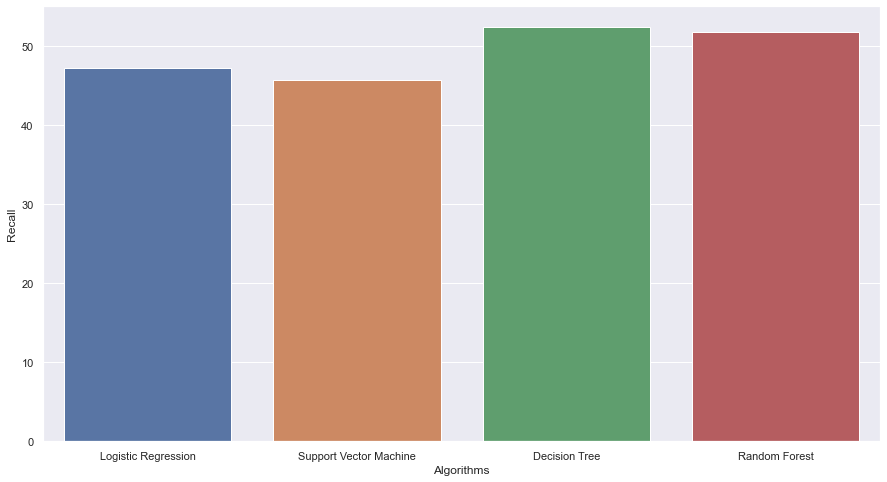

In [84]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Recall")

sns.barplot(algorithms,scores)
plt.show()

In [85]:
scores = [score_lr_f1_score,score_svm_f1_score,score_dt_f1_score,score_rf_f1_score]
algorithms = ["Logistic Regression","Support Vector Machine","Decision Tree","Random Forest"]    


for i in range(len(algorithms)):
    print("The F1 Score achieved using "+algorithms[i]+" is: "+str(scores[i]))

The F1 Score achieved using Logistic Regression is: 55.54
The F1 Score achieved using Support Vector Machine is: 54.85
The F1 Score achieved using Decision Tree is: 51.36
The F1 Score achieved using Random Forest is: 60.87


C:\Users\Prathamesh\.conda\envs\Project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


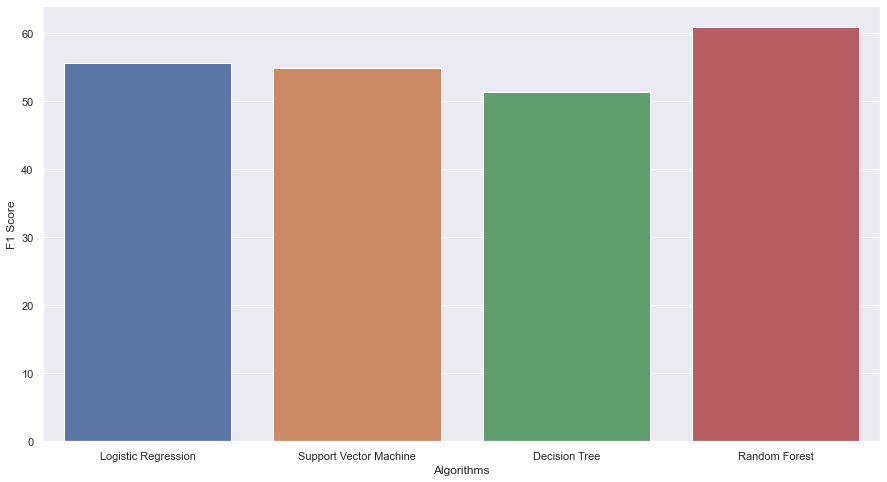

In [86]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("F1 Score")

sns.barplot(algorithms,scores)
plt.show()

In [91]:
scores = [score_lr,score_svm,score_dt,score_rf,a[1]*100]
algorithms = ["Logistic Regression","Support Vector Machine","Decision Tree","Random Forest","Neural Network"]    


for i in range(len(algorithms)):
    print("The Accuracy Score achieved using "+algorithms[i]+" is: "+str(scores[i]))

The Accuracy Score achieved using Logistic Regression is: 83.07
The Accuracy Score achieved using Support Vector Machine is: 83.14
The Accuracy Score achieved using Decision Tree is: 77.77
The Accuracy Score achieved using Random Forest is: 85.09
The Accuracy Score achieved using Neural Network is: 83.17972421646118


C:\Users\Prathamesh\.conda\envs\Project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


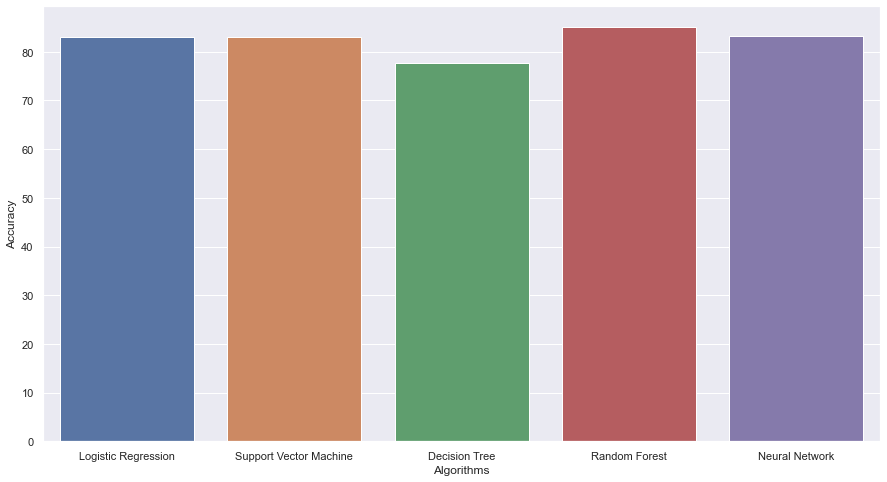

In [92]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")

sns.barplot(algorithms,scores)
plt.show()

# Rain Tommorrow

In [93]:
x=dff.drop(['RainToday','RainTomorrow','Rainfall'],axis=1)
y=dff['RainTomorrow']

In [58]:
x

,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
6049,17.9,35.2,11,48.0,1,12,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4
6050,18.4,28.9,8,37.0,10,10,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0
6052,19.4,37.6,5,46.0,5,6,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9
6053,21.9,38.4,14,31.0,14,15,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6
6054,24.2,41.0,14,35.0,7,14,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,19.3,33.4,1,35.0,9,4,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3
142299,21.2,32.6,0,37.0,9,9,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0
142300,20.7,32.8,0,33.0,0,13,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1
142301,19.5,31.8,2,26.0,9,6,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2


In [94]:
from sklearn.model_selection import train_test_split
x_train,x_test , y_train, y_test = train_test_split(x, y,test_size=0.2)

# Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train,y_train)#train model

Y_pred_lr = lr.predict(x_test)

C:\Users\Prathamesh\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\logistic.py:430: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  warnings.warn("Default solver will be changed to 'lbfgs' in 0.22. "


In [96]:
score_lr = round(accuracy_score(Y_pred_lr,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.34 %


<AxesSubplot:title={'center':'Logistic_Regression'}>

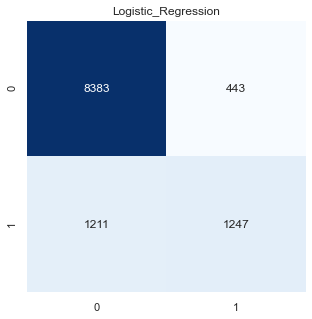

In [98]:
sns.set(rc={'figure.figsize':(5,5)})
lr_cm=confusion_matrix(y_test,Y_pred_lr)
plt.title("Logistic_Regression")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [99]:
score_lr_precision=metrics.precision_score(Y_pred_lr,y_test)
score_lr_recall=round(metrics.recall_score(y_test,Y_pred_lr)*100,2)
score_lr_f1_score=round(metrics.f1_score(y_test, Y_pred_lr)*100,2)

In [63]:
import pickle
with open('raintomorrow_lr_new.sav','wb') as f:
    pickle.dump(lr,f)

# SVM

In [100]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(x_train, y_train)

Y_pred_svm = sv.predict(x_test)
score_svm = round(accuracy_score(Y_pred_svm,y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 84.97 %


<AxesSubplot:title={'center':'SVM'}>

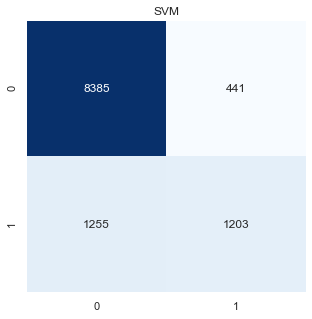

In [101]:
lr_cm=confusion_matrix(y_test,Y_pred_svm)
plt.title("SVM")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [102]:
score_svm_precision=metrics.precision_score(Y_pred_svm,y_test)
score_svm_recall=round(metrics.recall_score(y_test,Y_pred_svm)*100,2)
score_svm_f1_score=round(metrics.f1_score(y_test,Y_pred_svm)*100,2)

In [66]:
import pickle
with open('raintommorrow_svm_new.sav','wb') as f:
    pickle.dump(sv,f)

# Decision Tree

In [103]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
Y_pred_dt = dt.predict(x_test)
score_dt = round(accuracy_score(Y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 79.26 %


<AxesSubplot:title={'center':'Decision Tree'}>

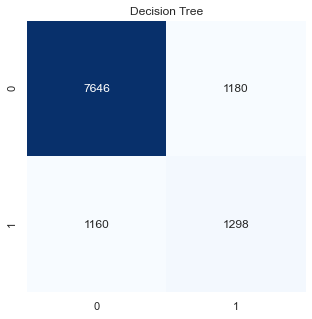

In [104]:
lr_cm=confusion_matrix(y_test,Y_pred_dt)
plt.title("Decision Tree")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [105]:
score_dt_precision=metrics.precision_score(Y_pred_dt,y_test)
score_dt_recall=round(metrics.recall_score(y_test,Y_pred_dt)*100,2)
score_dt_f1_score=round(metrics.f1_score(y_test,Y_pred_dt)*100,2)

In [69]:
import pickle
with open('raintommorrow_dt_new.sav','wb') as f:
    pickle.dump(dt,f)

# Random Forest

In [106]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,n_jobs=2,verbose=2)
rfc.fit(x_train,y_train)
score_rf=rfc.score(x_test,y_test)
Y_pred_rf = rfc.predict(x_test)
score_rf=round(accuracy_score(Y_pred_rf,y_test)*100,2)
print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    2.3s


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    5.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


The accuracy score achieved using Random Forest is: 85.86 %


[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


<AxesSubplot:title={'center':'Random Forest'}>

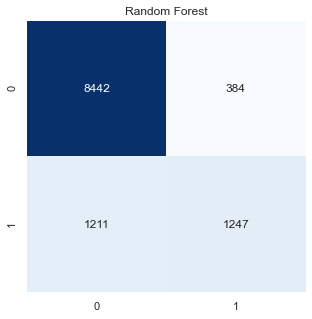

In [107]:
lr_cm=confusion_matrix(y_test,Y_pred_rf)
plt.title("Random Forest")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [111]:
score_rf_precision=metrics.precision_score(Y_pred_rf,y_test)
score_rf_recall=round(metrics.recall_score(y_test,Y_pred_rf)*100,2)
score_rf_f1_score=round(metrics.f1_score(y_test,Y_pred_rf)*100,2)

In [73]:
import pickle
with open('raintommorrow_rf_new.sav','wb') as f:
    pickle.dump(rfc,f)

# Neural Network

In [108]:
from tensorflow import keras
model=tf.keras.Sequential([
    keras.layers.Dense(20,input_shape=(16,),activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])

In [109]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [110]:
model.fit(x_train,y_train,epochs=30)

Epoch 1/30
1411/1411 [==============================] - 2s 1ms/step - loss: 4.1156 - accuracy: 0.7812
Epoch 2/30
1411/1411 [==============================] - 1s 784us/step - loss: 0.4888 - accuracy: 0.8095
Epoch 3/30
1411/1411 [==============================] - 1s 857us/step - loss: 0.4762 - accuracy: 0.8140
Epoch 4/30
1411/1411 [==============================] - 1s 742us/step - loss: 0.4654 - accuracy: 0.8144
Epoch 5/30
1411/1411 [==============================] - 1s 970us/step - loss: 0.4517 - accuracy: 0.8165
Epoch 6/30
1411/1411 [==============================] - 2s 1ms/step - loss: 0.4511 - accuracy: 0.8189: 0s - loss: 0.4622 - ac
Epoch 7/30
1411/1411 [==============================] - 1s 983us/step - loss: 0.4630 - accuracy: 0.8129
Epoch 8/30
1411/1411 [==============================] - 1s 914us/step - loss: 0.4488 - accuracy: 0.8155
Epoch 9/30
1411/1411 [==============================] - 1s 886us/step - loss: 0.4620 - accuracy: 0.8154
Epoch 10/30
1411/1411 [=====================

In [116]:
a=model.evaluate(x_test,y_test)

353/353 [==============================] - 0s 572us/step - loss: 0.3441 - accuracy: 0.8525


In [78]:
pred=model.predict(x_test)

In [79]:
pred_new=[]
for m in pred:
    if m>0.4:
        pred_new.append(1)
    else:
        pred_new.append(0)

<AxesSubplot:title={'center':'ANN'}>

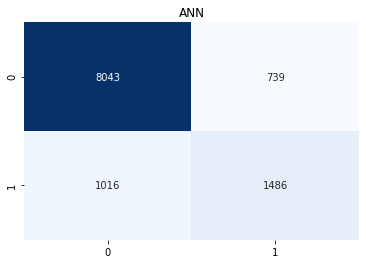

In [80]:
lr_cm=confusion_matrix(y_test,pred_new)
plt.title("ANN")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [81]:
model.save("raintom_ann.hp5")

INFO:tensorflow:Assets written to: raintom_ann.hp5\assets


In [112]:
scores = [score_lr_precision,score_svm_precision,score_dt_precision,score_rf_precision]
algorithms = ["Logistic Regression","Support Vector Machine","Decision Tree","Random Forest"]    


for i in range(len(algorithms)):
    print("The Precision achieved using "+algorithms[i]+" is: "+str(scores[i]))

The Precision achieved using Logistic Regression is: 0.5073230268510984
The Precision achieved using Support Vector Machine is: 0.48942229454841335
The Precision achieved using Decision Tree is: 0.5280716029292107
The Precision achieved using Random Forest is: 0.5073230268510984


C:\Users\Prathamesh\.conda\envs\Project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


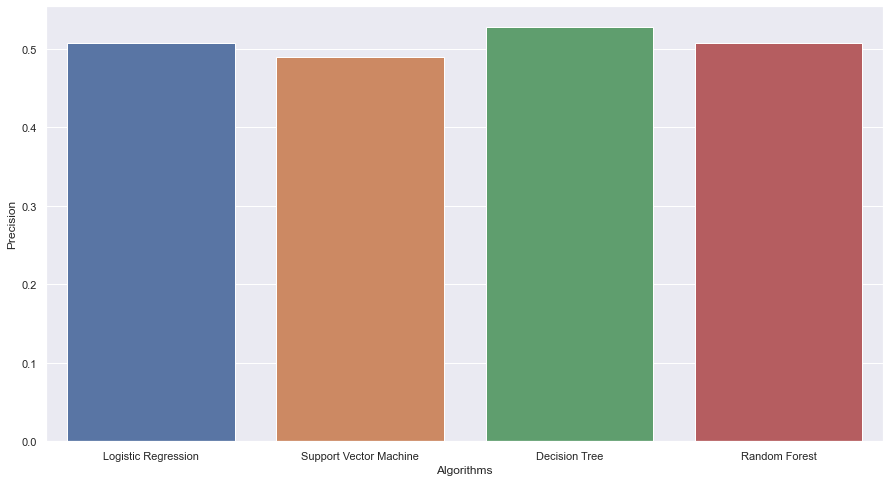

In [113]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Precision")

sns.barplot(algorithms,scores)
plt.show()

In [114]:
scores = [score_lr_f1_score,score_svm_f1_score,score_dt_f1_score,score_rf_f1_score]
algorithms = ["Logistic Regression","Support Vector Machine","Decision Tree","Random Forest"]    


for i in range(len(algorithms)):
    print("The F1 Score achieved using "+algorithms[i]+" is: "+str(scores[i]))

The F1 Score achieved using Logistic Regression is: 60.13
The F1 Score achieved using Support Vector Machine is: 58.65
The F1 Score achieved using Decision Tree is: 52.59
The F1 Score achieved using Random Forest is: 60.99


C:\Users\Prathamesh\.conda\envs\Project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


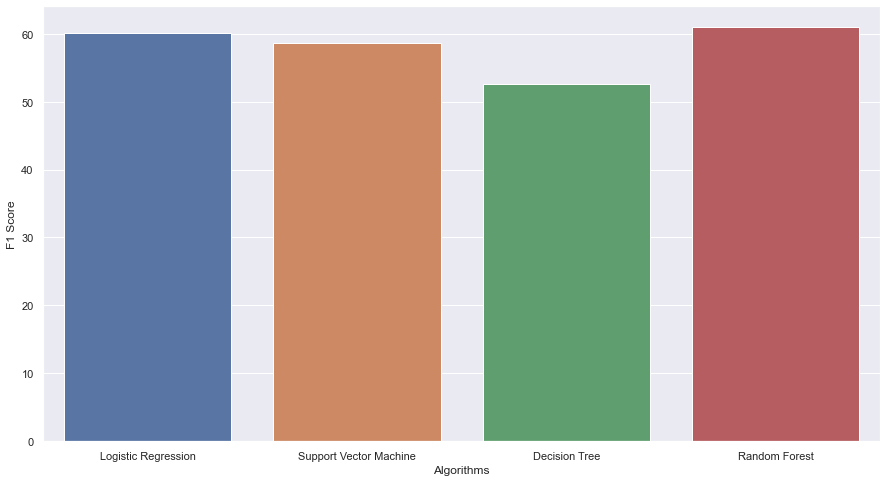

In [115]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("F1 Score")

sns.barplot(algorithms,scores)
plt.show()

In [117]:
scores = [score_lr,score_svm,score_dt,score_rf,a[1]*100]
algorithms = ["Logistic Regression","Support Vector Machine","Decision Tree","Random Forest","Neural Network"]    


for i in range(len(algorithms)):
    print("The Accuracy Score achieved using "+algorithms[i]+" is: "+str(scores[i]))

The Accuracy Score achieved using Logistic Regression is: 85.34
The Accuracy Score achieved using Support Vector Machine is: 84.97
The Accuracy Score achieved using Decision Tree is: 79.26
The Accuracy Score achieved using Random Forest is: 85.86
The Accuracy Score achieved using Neural Network is: 85.2534532546997


C:\Users\Prathamesh\.conda\envs\Project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


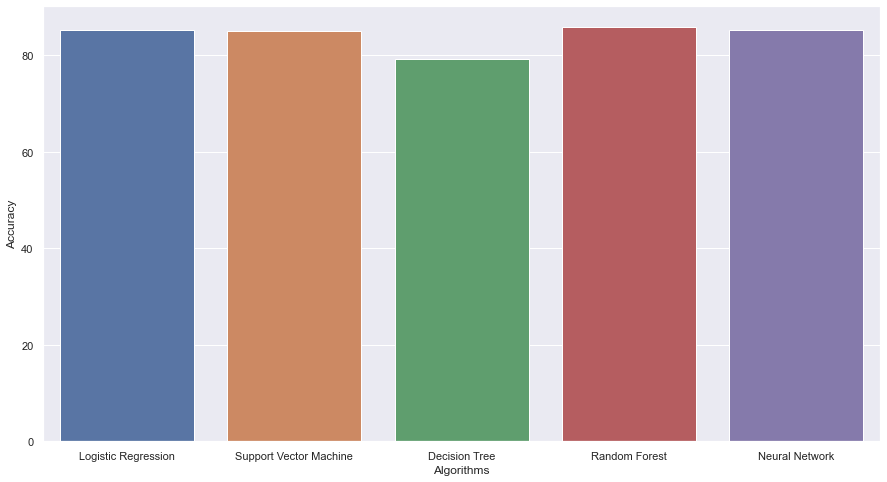

In [118]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")

sns.barplot(algorithms,scores)
plt.show()

In [119]:
scores = [score_lr_recall,score_svm_recall,score_dt_recall,score_rf_recall]
algorithms = ["Logistic Regression","Support Vector Machine","Decision Tree","Random Forest"]    


for i in range(len(algorithms)):
    print("The Recall achieved using "+algorithms[i]+" is: "+str(scores[i]))

The Recall achieved using Logistic Regression is: 50.73
The Recall achieved using Support Vector Machine is: 48.94
The Recall achieved using Decision Tree is: 52.81
The Recall achieved using Random Forest is: 50.73


C:\Users\Prathamesh\.conda\envs\Project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


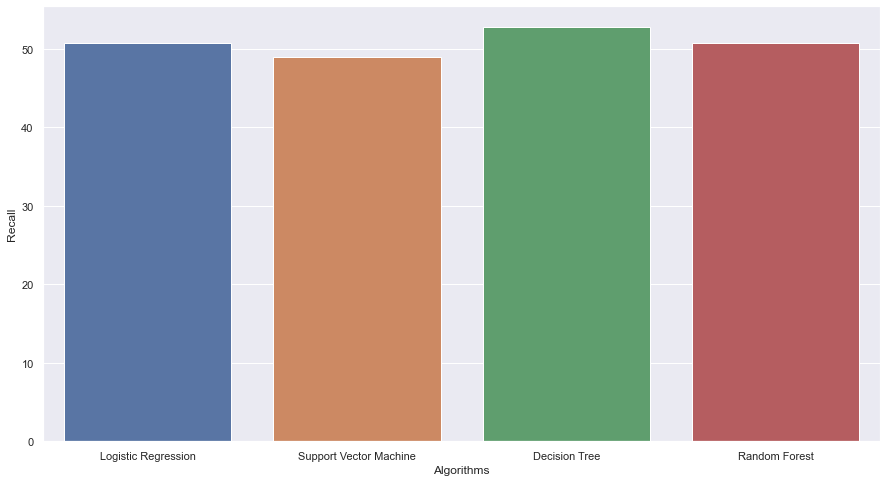

In [120]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Recall")

sns.barplot(algorithms,scores)
plt.show()